In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.stages import *


lm.models.RECORD_DIR='./models/records'

### PATH 

#PATH = './dataset/'
PATH = './data/v2-plant-seedlings-dataset'

####Data loading
####---------

data = lf.data_builder.create_dataset_from_directory(PATH)


#### Train Campaigns
campaign_id='test'


Model Loading
---------

## **Stage 1**

### *```ResNetV2```*

In [6]:
#### Stage 1
stage1_resnet = stage1.Stage1ResNetv2(data, campaign_id)
stage1_resnet.fit_or_load(training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_ResNetv2 –– Loading


### *```MobileNetV3```*

In [7]:
stage1_mobilenet = stage1.Stage1MobileNetv3(data, campaign_id)
stage1_mobilenet.fit_or_load(training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_MobileNetv3 –– Loading


**Model evaluation**
-------

In [8]:
img = data.dataframe.iloc[8]
print(f"Pred : {stage1_mobilenet.single_prediction(img.path)}")
print(f"Actual : {img.label}")

>>> Stage-1_MobileNetv3 –– Evaluation


2023-10-30 15:33:54.180395: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 2s 2s/step
Pred : Cleavers
Actual : Cleavers


### *```MobileNetV2```*

In [ ]:
results = stage1_mobilenet.evaluate()
display(results)

### *```MobileNetV2 grad cam```*

>>> Stage-1_MobileNetv3 –– Display training data samples


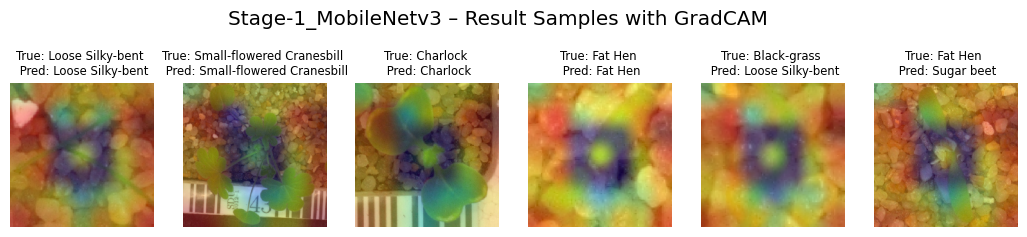

In [42]:
stage1_mobilenet.display_samples(nb=6, gradcam=True)

### *```ResNetV2 grad cam```*

>>> Stage-1_ResNetv2 –– Evaluation
18/18 [==============================] - 24s 1s/step
>>> Stage-1_ResNetv2 –– Display training data samples


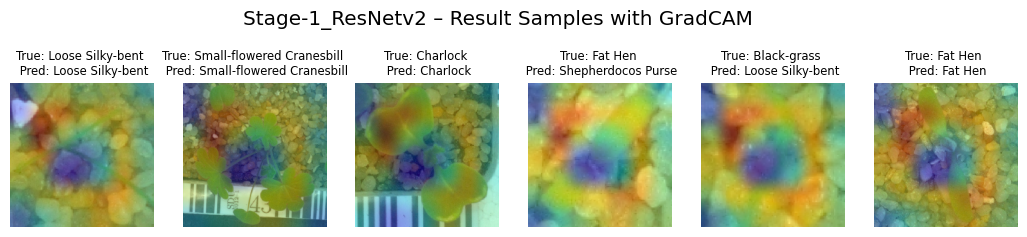

In [43]:
stage1_resnet.evaluate()
stage1_resnet.display_samples(nb=6, gradcam=True)

### *```ResNetV2 classification report```*

In [ ]:
stage1_resnet.print_classification_report();

### *```MobileNetV2 classification report```*

In [ ]:
stage1_mobilenet.print_classification_report();

### *```MobileNetV2 prediction```*

In [46]:
stage1_mobilenet.single_prediction(img.path)


>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 0s 52ms/step


'Common wheat'

### *```ResNetV2 prediction```*

In [47]:
stage1_resnet.single_prediction(img.path)

>>> Stage-1_ResNetv2 –– Evaluation


1/1 [==============================] - 1s 676ms/step


'Common wheat'

## **Stage2**

### *```MobileNetV2```*

In [17]:
#### Stage 2
stage2_mobilenet = stage2.Stage2MobileNetv3(data)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/b7/3_z_zc4x7r74hq03265zwfbc0000gn/T/ipykernel_87111/3552787339.py", line 2, in <module>
    stage2_mobilenet = stage2.Stage2MobileNetv3(data)
  File "/Users/olivier/AU23_Plantes/src/models/stages/stage2.py", line 45, in __init__
  File "/Users/olivier/AU23_Plantes/src/models/stages/stage2.py", line 26, in __init__
    x = GlobalAveragePooling2D()(x)
  File "/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/keras/engine/input_spec.py", line 235, in assert_input_compatibility
    raise ValueError(
ValueError: Input 0 of layer "global_average_pooling2d_1" is incompatible with the

In [6]:

stage2_mobilenet.fit_or_load( training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-2_MobileNetv3 –– Loading


### *```ResNetV2```*

In [15]:
#### Stage 2
stage2_resnetv3 = Stage2ResNetv2(data, campaign_id)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/b7/3_z_zc4x7r74hq03265zwfbc0000gn/T/ipykernel_87111/2700260259.py", line 2, in <module>
    stage2_resnetv3 = Stage2ResNetv2(data)
  File "/Users/olivier/AU23_Plantes/src/models/stages/stage2.py", line 57, in __init__
  File "/Users/olivier/AU23_Plantes/src/models/stages/stage2.py", line 26, in __init__
    x = GlobalAveragePooling2D()(x)
  File "/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/olivier/pythonEnvs/tf2/lib/python3.9/site-packages/keras/engine/input_spec.py", line 235, in assert_input_compatibility
    raise ValueError(
ValueError: Input 0 of layer "global_average_pooling2d" is incompatible with the layer: expec

In [7]:
stage2_resnetv3.fit_or_load(training=True)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-2_ResNetv2 –– Training


2023-10-30 15:53:03.186013: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


138/138 [==============================] - 269s 2s/step - loss: 2.1751 - categorical_accuracy: 0.2070 - val_loss: 2.0380 - val_categorical_accuracy: 0.2542 - lr: 0.0010
>>> Stage-2_ResNetv2 –– Serialize 


In [8]:
stage2_resnetv3.evaluate()

>>> Stage-2_ResNetv2 –– Evaluation
18/18 [==============================] - 29s 2s/step


,filename,actual,predicted,Same
0,data/v2-plant-seedlings-dataset/Shepherd’s Pur...,Shepherd’s Purse,Fat Hen,False
1,data/v2-plant-seedlings-dataset/Charlock/216.png,Charlock,Shepherd’s Purse,False
2,data/v2-plant-seedlings-dataset/Sugar beet/353...,Sugar beet,Fat Hen,False
3,data/v2-plant-seedlings-dataset/Scentless Mayw...,Scentless Mayweed,Fat Hen,False
4,data/v2-plant-seedlings-dataset/Cleavers/100.png,Cleavers,Fat Hen,False
...,...,...,...,...
549,data/v2-plant-seedlings-dataset/Scentless Mayw...,Scentless Mayweed,Common Chickweed,False
550,data/v2-plant-seedlings-dataset/Small-flowered...,Small-flowered Cranesbill,Shepherd’s Purse,False
551,data/v2-plant-seedlings-dataset/Scentless Mayw...,Scentless Mayweed,Fat Hen,False
552,data/v2-plant-seedlings-dataset/Loose Silky-be...,Loose Silky-bent,Shepherd’s Purse,False


>>> Stage-2_ResNetv2 –– Display training data samples


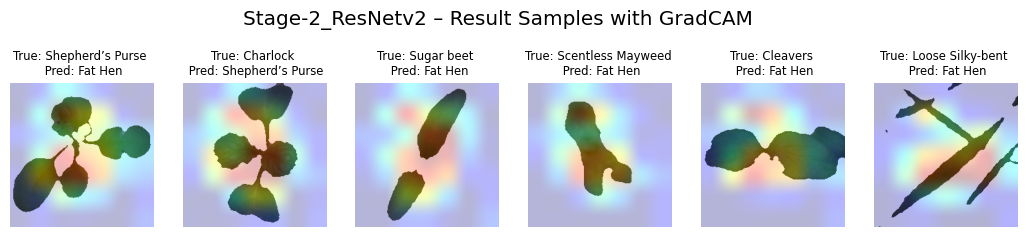

In [9]:
stage2_resnetv3.display_samples(nb=6, gradcam=True, segmented=True) 

>>> Stage-2_ResNetv2 –– Display training data samples


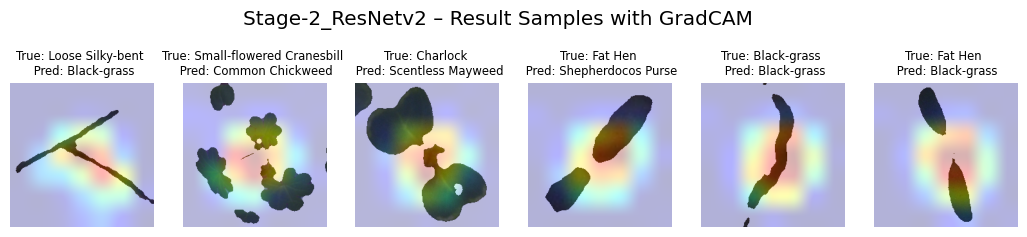

In [51]:
stage2_resnetv3.display_samples(nb=6, gradcam=True, segmented=True)

>>> Stage-2_ResNetv2 –– Display training data samples


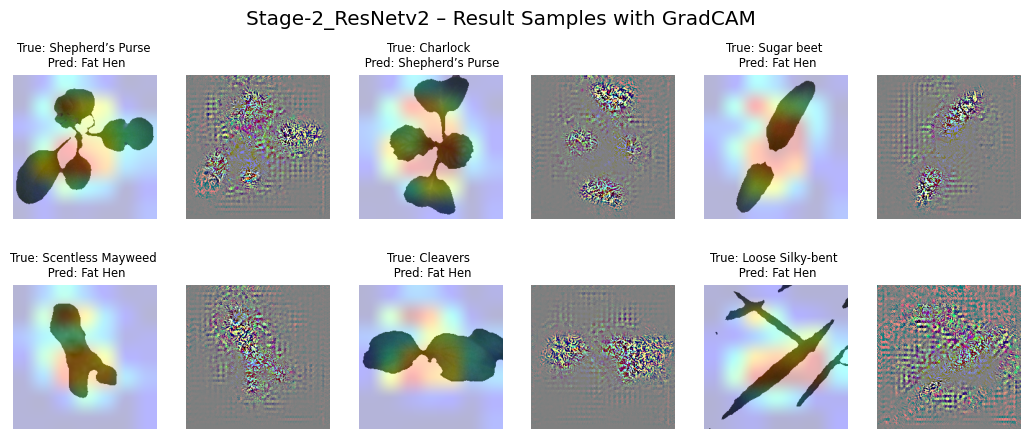

In [10]:
stage2_resnetv3.display_samples(nb=12, gradcam=True, segmented=True, guidedGrad_cam=True)

>>> Stage-2_ResNetv2 –– Display training data samples


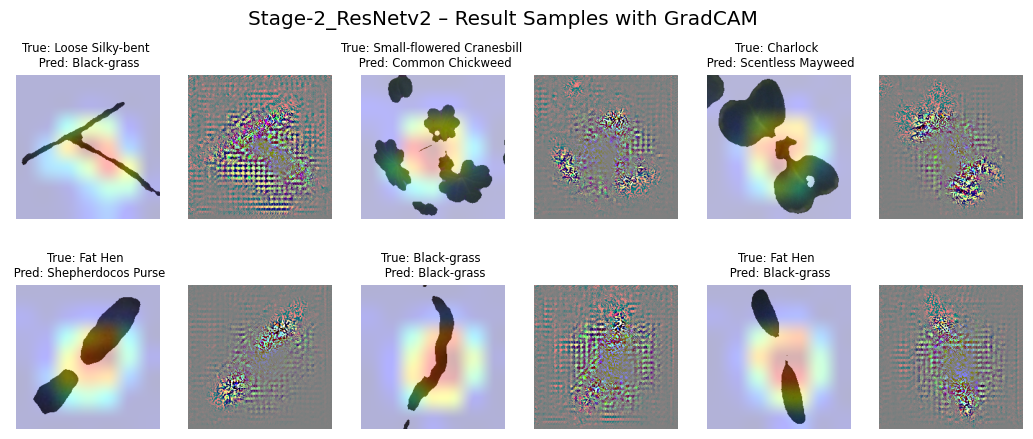

In [52]:
stage2_resnetv3.display_samples(nb=12, gradcam=True, segmented=True, guidedGrad_cam=True)

In [12]:
#### Stage 2
stage2_mobilenetv3 = stage2.Stage2MobileNetv3(data, campaign_id)
stage2_mobilenetv3.fit_or_load( training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-2_MobileNetv3 –– Loading


In [13]:
stage2_mobilenetv3.evaluate()

>>> Stage-2_MobileNetv3 –– Evaluation
18/18 [==============================] - 12s 653ms/step


,filename,actual,predicted,Same
0,data/v2-plant-seedlings-dataset/Shepherd’s Pur...,Shepherd’s Purse,Loose Silky-bent,False
1,data/v2-plant-seedlings-dataset/Charlock/216.png,Charlock,Small-flowered Cranesbill,False
2,data/v2-plant-seedlings-dataset/Sugar beet/353...,Sugar beet,Loose Silky-bent,False
3,data/v2-plant-seedlings-dataset/Scentless Mayw...,Scentless Mayweed,Loose Silky-bent,False
4,data/v2-plant-seedlings-dataset/Cleavers/100.png,Cleavers,Loose Silky-bent,False
...,...,...,...,...
549,data/v2-plant-seedlings-dataset/Scentless Mayw...,Scentless Mayweed,Shepherd’s Purse,False
550,data/v2-plant-seedlings-dataset/Small-flowered...,Small-flowered Cranesbill,Shepherd’s Purse,False
551,data/v2-plant-seedlings-dataset/Scentless Mayw...,Scentless Mayweed,Loose Silky-bent,False
552,data/v2-plant-seedlings-dataset/Loose Silky-be...,Loose Silky-bent,Shepherd’s Purse,False


>>> Stage-2_MobileNetv3 –– Display training data samples


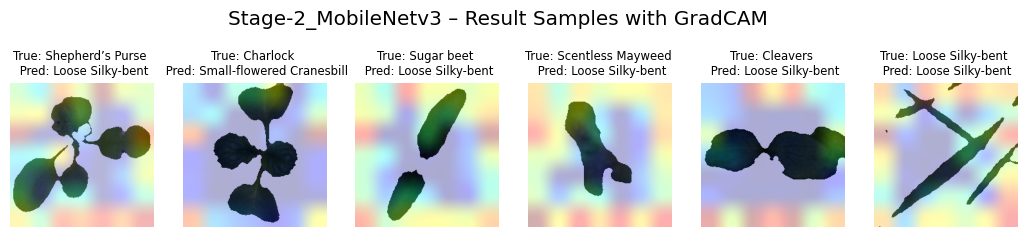

In [14]:
stage2_mobilenetv3.display_samples(nb=6, gradcam=True, segmented=True)

>>> Stage-2_MobileNetv3 –– Display training data samples


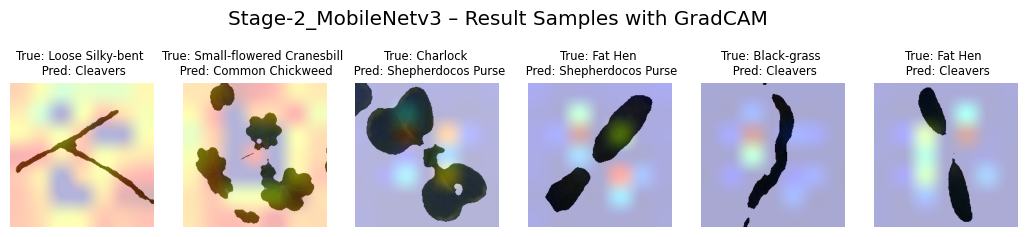

In [55]:
stage2_mobilenetv3.display_samples(nb=6, gradcam=True, segmented=True)

>>> Stage-2_MobileNetv3 –– Display training data samples


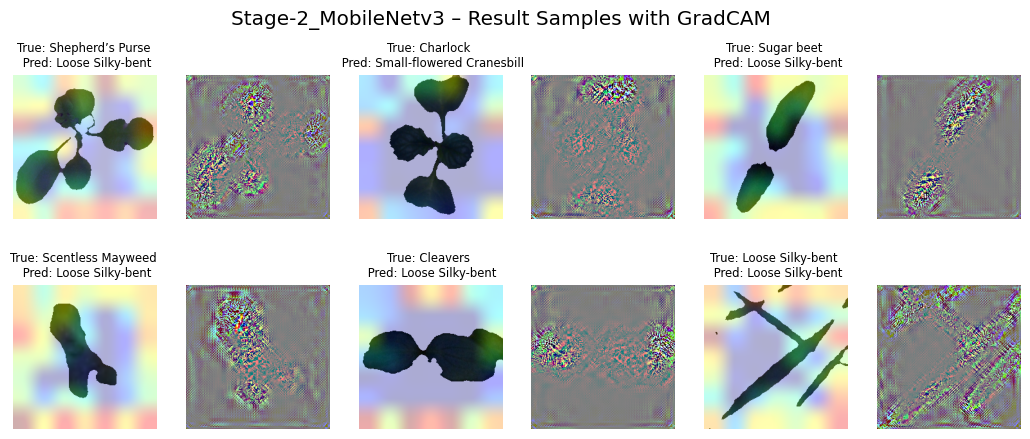

In [15]:
stage2_mobilenetv3.display_samples(nb=12, gradcam=True, segmented=True, guidedGrad_cam=True)

>>> Stage-2_MobileNetv3 –– Display training data samples


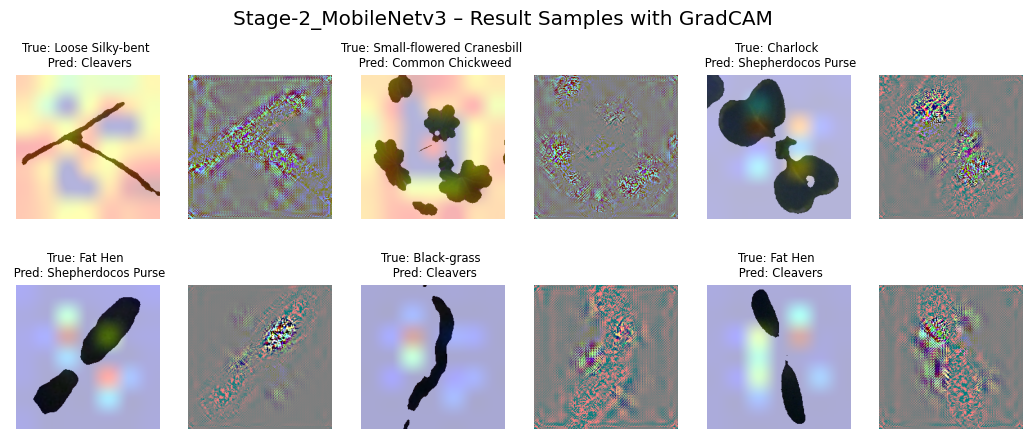

In [56]:
stage2_mobilenetv3.display_samples(nb=12, gradcam=True, segmented=True, guidedGrad_cam=True)

## __Background Removal__

- Two colors : **black** and **white**

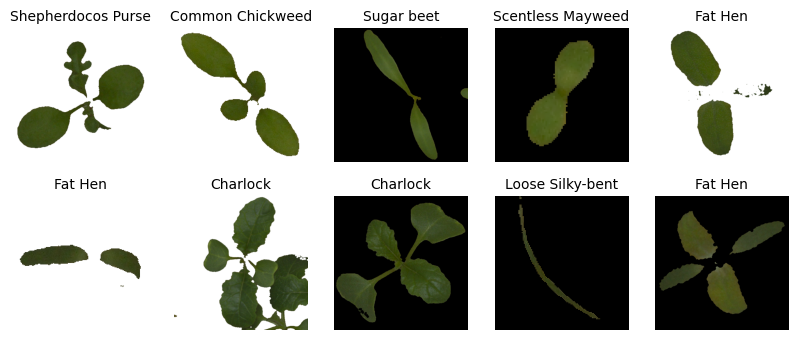

In [57]:
np.random.seed(3)

f, axes = plt.subplots(2, 5, figsize=(10, 4))
colors  = ['white', 'black']
index   = -1
for i in range(2):
    for j in range(5):
        index = random.sample(range(data.dataframe.shape[0]), 1)[0]
        img = data.dataframe.iloc[index]
        img = plt.imread(img.path)
        image_without_bg = lf.segmentation.remove_background(x=tf.constant(img, dtype=tf.float32), color=colors[np.random.choice([0, 1])])
        axes[i, j].axis('off')
        axes[i, j].imshow(image_without_bg)
        axes[i, j].set_title(data.dataframe.label[index], fontsize='medium')

plt.show()

## __Histogram of Colors__

### *```Hyper parameters```* 

- **data** : is a dataframe 
- **select_index** : is a list of integer valeurs use to select images in the dataframe
- **figsize** : is a  tuple to resize figure 

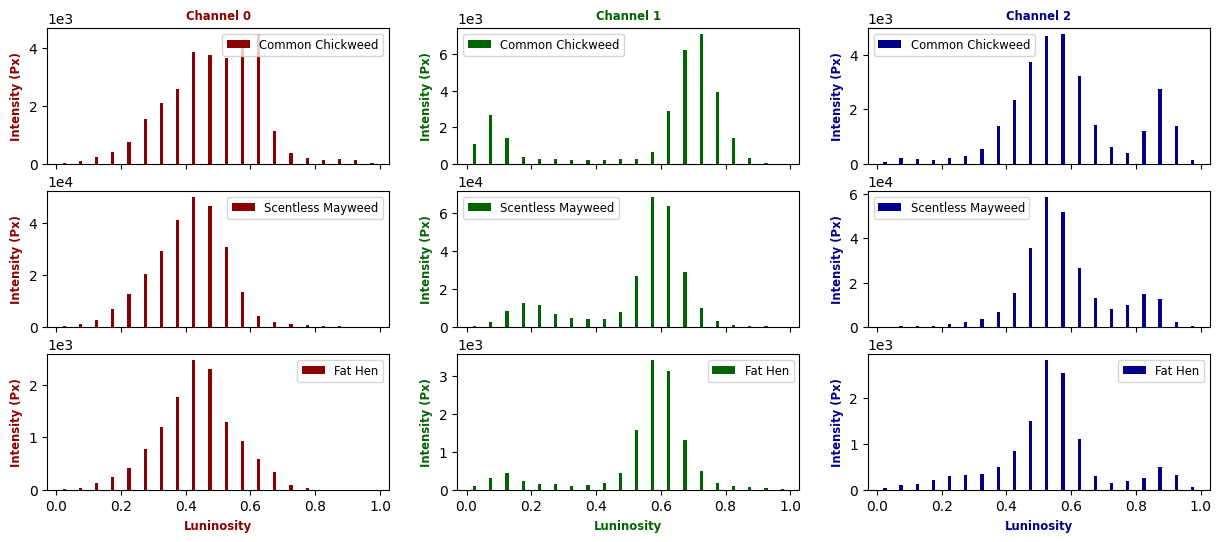

In [58]:
select_index = random.sample(range(data.dataframe.shape[0]), 3)
lf.segmentation.Plot_Histograms(data=data, select_index=select_index , figsize=(15, 6))


#### Stage 3


In [7]:
stage3_mobilenet = Stage3MobileNetv3(data)
stage3_mobilenet.fit_or_load(campaign_id, training=False)
stage3_resnet = Stage3ResNetv2(data)
stage3_resnet.fit_or_load(campaign_id, training=True)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-3_MobileNetv3 –– Loading
Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-3_ResNetv2 –– Training
138/138 [==============================] - 306s 2s/step - loss: 2.0189 - categorical_accuracy: 0.2717 - val_loss: 2.0262 - val_categorical_accuracy: 0.2508 - lr: 1.0000e-04
>>> Stage-3_ResNetv2 –– Serialize 


#### Stage 4


In [13]:
#stage4_mobilenet = Stage4MobileNetv3(data)
#stage4_mobilenet.fit_or_load(campaign_id, training=True)
stage4_resnet = Stage4ResNetv2(data)
stage4_resnet.fit_or_load(campaign_id, training=True)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.


ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 2048)